In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_no_MCAR.csv')
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           752 non-null    float64
 1   Glucose            752 non-null    float64
 2   Diastolic_BP       724 non-null    float64
 3   Skin_Fold          534 non-null    float64
 4   Serum_Insulin      392 non-null    float64
 5   BMI                752 non-null    float64
 6   Diabetes_Pedigree  752 non-null    float64
 7   Age                752 non-null    int64  
 8   Class              752 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 53.0 KB


In [4]:
df.isnull().sum()

Pregnant               0
Glucose                0
Diastolic_BP          28
Skin_Fold            218
Serum_Insulin        360
BMI                    0
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [5]:
import missingno as msno

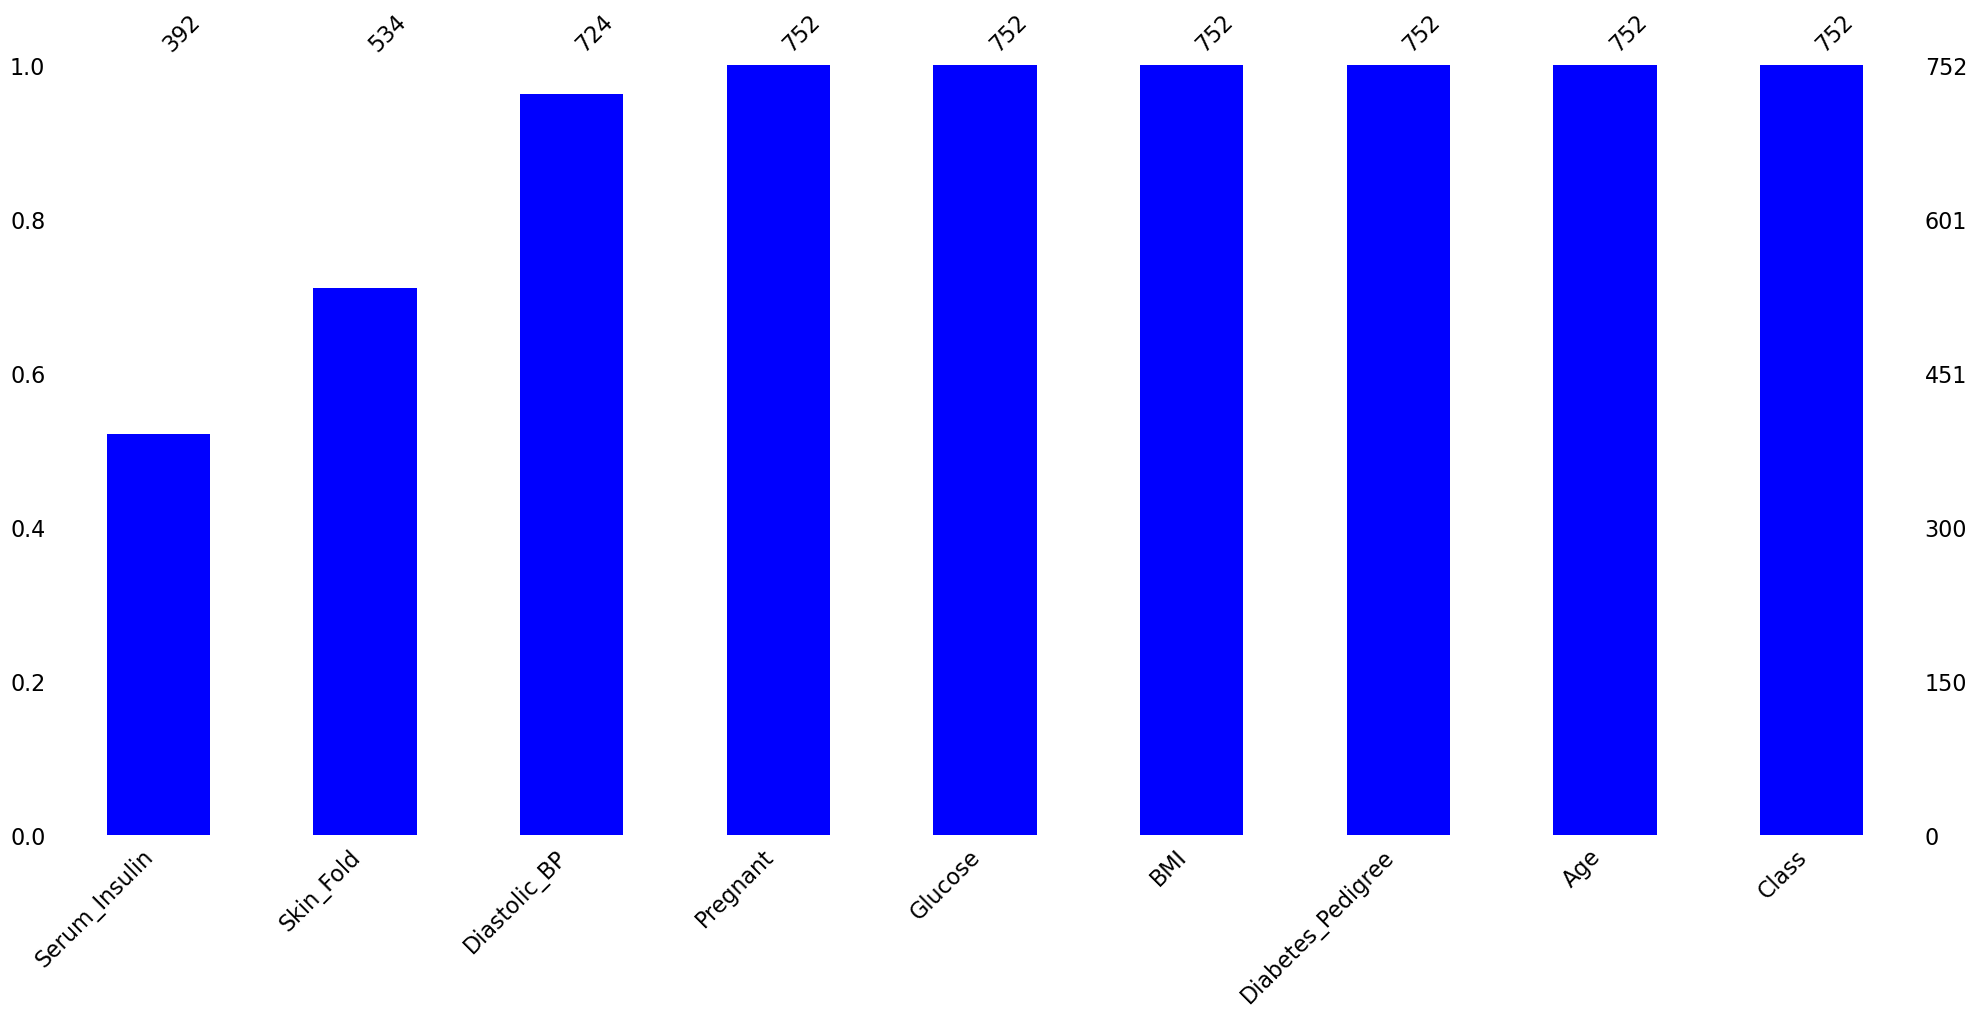

In [6]:
msno.bar(df, color = 'blue', sort= 'ascending');

## Simple Imputation

In [7]:
from sklearn.impute import SimpleImputer

# Mean Imputer
diabetes_mean = df.copy(deep = True)

mean_imputer = SimpleImputer(strategy = 'mean')

diabetes_mean.iloc[:,:] = mean_imputer.fit_transform(diabetes_mean)

In [8]:
# Median Imputer
diabetes_median = df.copy(deep = True)
median_imputer = SimpleImputer(strategy = 'median')
diabetes_median.iloc[:,:] = median_imputer.fit_transform(diabetes_median)

In [9]:
# Mode Imputer
diabetes_mode = df.copy(deep = True)
mode_imputer = SimpleImputer(strategy = 'most_frequent')
diabetes_mode.iloc[:,:] = mode_imputer.fit_transform(diabetes_mode)

In [10]:
# Const Imputer
diabetes_const = df.copy(deep = True)
const_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
diabetes_const.iloc[:,:] = const_imputer.fit_transform(diabetes_const)

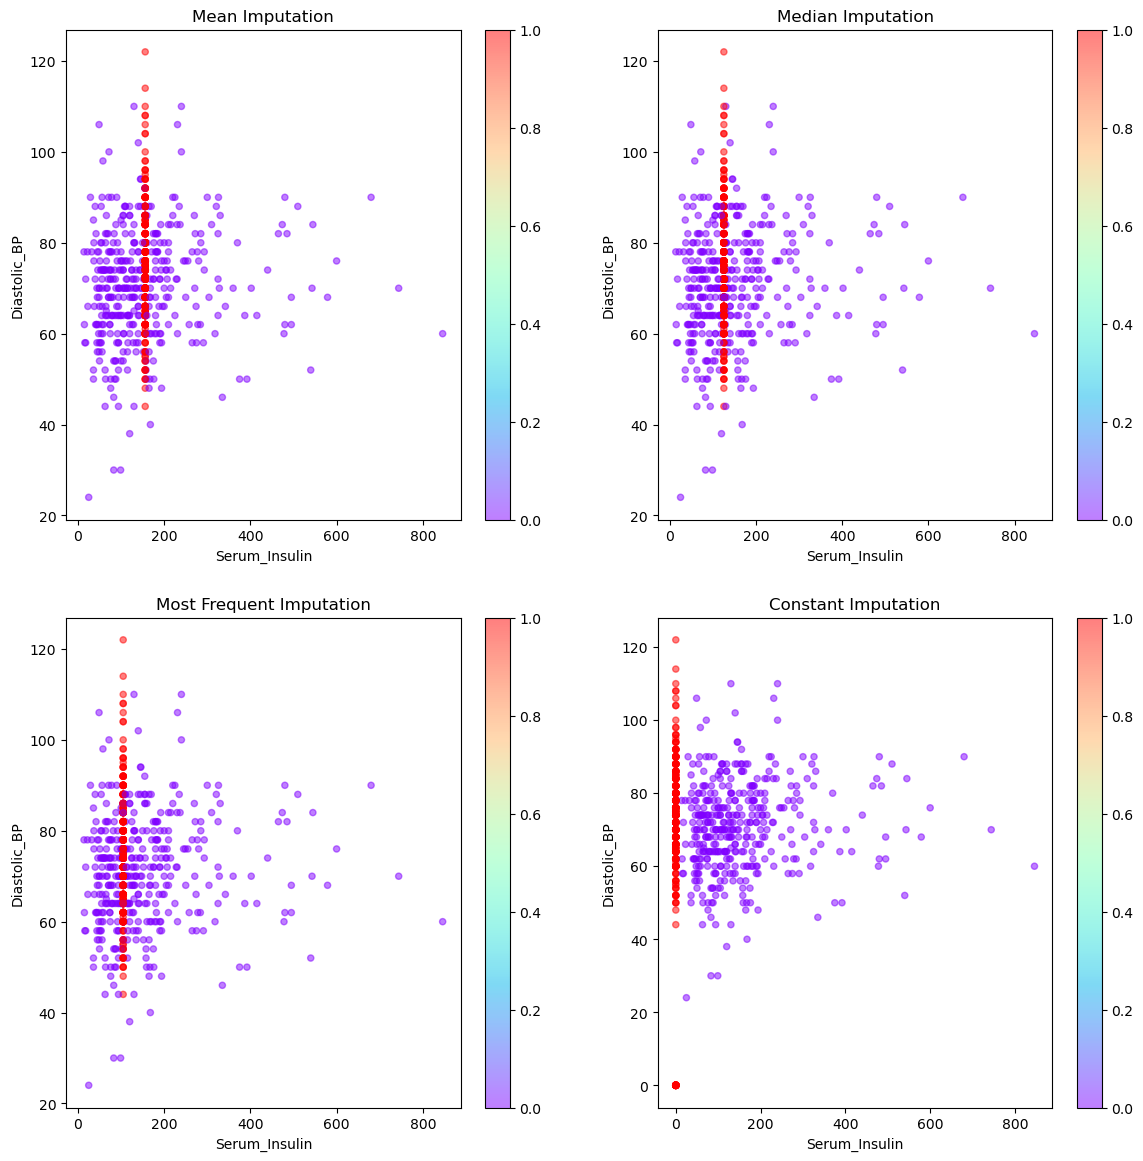

In [11]:
# Scatter plot of imputation

fig, axes = plt.subplots(2,2, figsize = (14,14))
nullity = df['Diastolic_BP'].isnull() + df['Serum_Insulin'].isnull()

imputations = {'Mean Imputation' : diabetes_mean,
              'Median Imputation' : diabetes_median,
              'Most Frequent Imputation' : diabetes_mode,
              'Constant Imputation' : diabetes_const}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'Serum_Insulin', y= 'Diastolic_BP', kind = 'scatter', alpha = 0.5,
                           c = nullity, cmap = 'rainbow', ax=ax, title =df_key)
    
plt.show()

## Advance Imputation Techniques

In [12]:
from fancyimpute import KNN

knn_inputer = KNN()
diabetes_knn = df.copy(deep = True)
diabetes_knn.iloc[:,:] = knn_inputer.fit_transform(diabetes_knn)

Imputing row 1/752 with 1 missing, elapsed time: 0.046
Imputing row 101/752 with 0 missing, elapsed time: 0.047
Imputing row 201/752 with 2 missing, elapsed time: 0.047
Imputing row 301/752 with 0 missing, elapsed time: 0.048
Imputing row 401/752 with 1 missing, elapsed time: 0.049
Imputing row 501/752 with 2 missing, elapsed time: 0.049
Imputing row 601/752 with 0 missing, elapsed time: 0.050
Imputing row 701/752 with 0 missing, elapsed time: 0.051


Imputing row 1/752 with 1 missing, elapsed time: 0.046
Imputing row 101/752 with 0 missing, elapsed time: 0.047
Imputing row 201/752 with 2 missing, elapsed time: 0.048
Imputing row 301/752 with 0 missing, elapsed time: 0.049
Imputing row 401/752 with 1 missing, elapsed time: 0.049
Imputing row 501/752 with 2 missing, elapsed time: 0.050
Imputing row 601/752 with 0 missing, elapsed time: 0.050
Imputing row 701/752 with 0 missing, elapsed time: 0.051


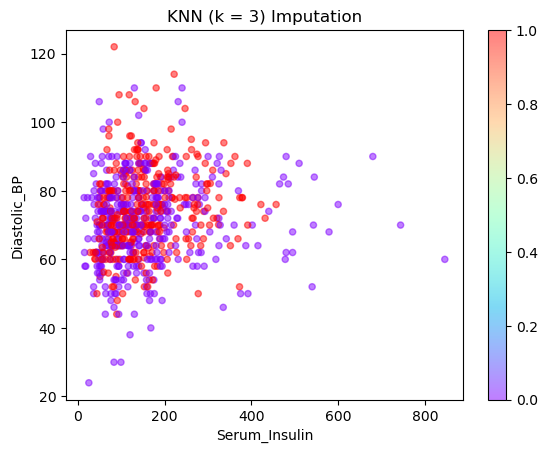

In [13]:
knn_imputer_3 = KNN(k = 3)
diabetes_knn_3 = df.copy(deep = True)

diabetes_knn_3.iloc[:,:] = knn_imputer_3.fit_transform(diabetes_knn_3)

nullity = df['Diastolic_BP'].isnull() + df['Serum_Insulin'].isnull()
diabetes_knn_3.plot(x = 'Serum_Insulin', y = 'Diastolic_BP', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'KNN (k = 3) Imputation')
plt.show()

Imputing row 1/752 with 0 missing, elapsed time: 0.044
Imputing row 101/752 with 0 missing, elapsed time: 0.044
Imputing row 201/752 with 0 missing, elapsed time: 0.044
Imputing row 301/752 with 0 missing, elapsed time: 0.044
Imputing row 401/752 with 0 missing, elapsed time: 0.044
Imputing row 501/752 with 0 missing, elapsed time: 0.044
Imputing row 601/752 with 0 missing, elapsed time: 0.044
Imputing row 701/752 with 0 missing, elapsed time: 0.044


/Users/jelena/miniconda3/lib/python3.10/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/var/folders/1l/453zph7s0hb95kynkss01f0w0000gn/T/ipykernel_2174/2119455018.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_knn_7.iloc[:,:] = knn_imputer_7.fit_transform(diabetes_knn_3)


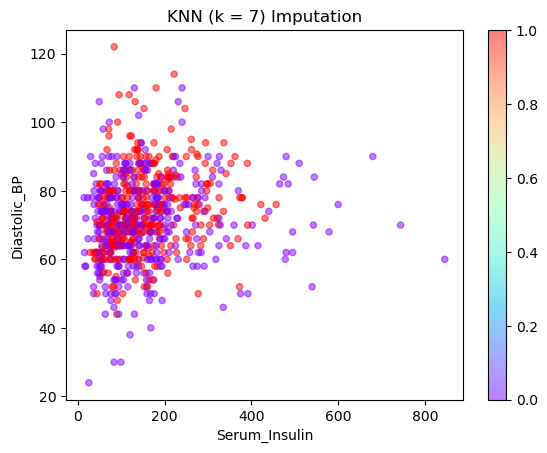

In [14]:
knn_imputer_7 = KNN(k = 7)
diabetes_knn_7 = df.copy(deep = True)

diabetes_knn_7.iloc[:,:] = knn_imputer_7.fit_transform(diabetes_knn_3)

nullity = df['Diastolic_BP'].isnull() + df['Serum_Insulin'].isnull()
diabetes_knn_7.plot(x = 'Serum_Insulin', y = 'Diastolic_BP', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'KNN (k = 7) Imputation')
plt.show()

/var/folders/1l/453zph7s0hb95kynkss01f0w0000gn/T/ipykernel_2174/1396948142.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_knn_10.iloc[:,:] = knn_imputer_10.fit_transform(diabetes_knn_10)


Imputing row 1/752 with 1 missing, elapsed time: 0.047
Imputing row 101/752 with 0 missing, elapsed time: 0.048
Imputing row 201/752 with 2 missing, elapsed time: 0.049
Imputing row 301/752 with 0 missing, elapsed time: 0.050
Imputing row 401/752 with 1 missing, elapsed time: 0.050
Imputing row 501/752 with 2 missing, elapsed time: 0.051
Imputing row 601/752 with 0 missing, elapsed time: 0.052
Imputing row 701/752 with 0 missing, elapsed time: 0.052


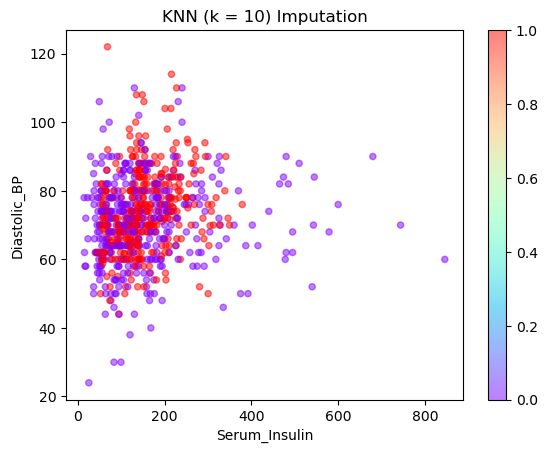

In [15]:
knn_imputer_10 = KNN(k = 10)
diabetes_knn_10 = df.copy(deep = True)

diabetes_knn_10.iloc[:,:] = knn_imputer_10.fit_transform(diabetes_knn_10)

nullity = df['Diastolic_BP'].isnull() + df['Serum_Insulin'].isnull()
diabetes_knn_10.plot(x = 'Serum_Insulin', y = 'Diastolic_BP', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'KNN (k = 10) Imputation')
plt.show()

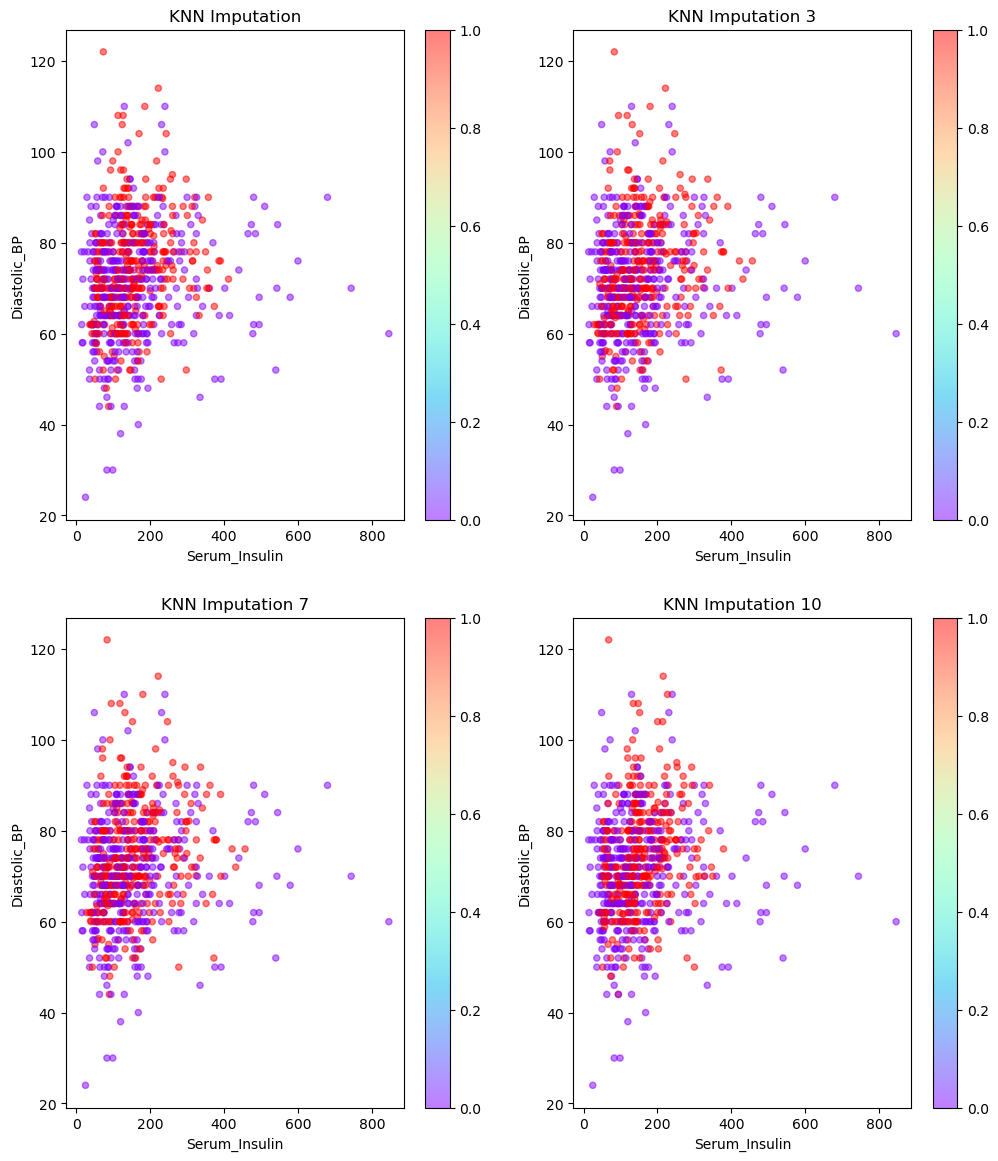

In [16]:
fig, axes = plt.subplots(2,2, figsize = (12,14))
nullity = df['Diastolic_BP'].isnull() + df['Serum_Insulin'].isnull()

imputations = {'KNN Imputation' : diabetes_knn,
              'KNN Imputation 3' : diabetes_knn_3,
               'KNN Imputation 7' : diabetes_knn_7,
               'KNN Imputation 10' : diabetes_knn_10,
               
              }

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'Serum_Insulin', y= 'Diastolic_BP', kind = 'scatter', alpha = 0.5,
                           c = nullity, cmap = 'rainbow', ax=ax, title =df_key)
    
plt.show()

/var/folders/1l/453zph7s0hb95kynkss01f0w0000gn/T/ipykernel_2174/535908830.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_MICE.iloc[:,:] = MICE_Imputer.fit_transform(diabetes_MICE)


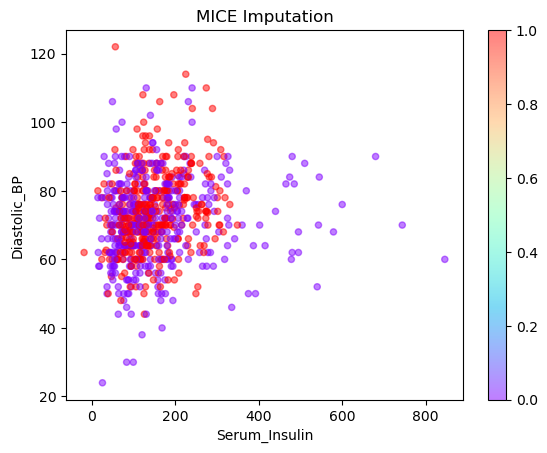

In [17]:
from fancyimpute import IterativeImputer

# Initialize Iterative Imputer
MICE_Imputer = IterativeImputer()

# Copy df to diabetes_MICE
diabetes_MICE = df.copy(deep = True)

diabetes_MICE.iloc[:,:] = MICE_Imputer.fit_transform(diabetes_MICE)

nullity = df['Diastolic_BP'].isnull() + df['Serum_Insulin'].isnull()
diabetes_MICE.plot(x = 'Serum_Insulin', y = 'Diastolic_BP', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'MICE Imputation')
plt.show()

## Evaluation of different  imputation techniques

In [18]:
import statsmodels.api as sm

# Complete case by dropping the rows with missing data
diabetes_cc = df.dropna(how= 'any')

X = sm.add_constant(diabetes_cc.iloc[:,:-1])
y = diabetes_cc['Class']

lm = sm.OLS(y,X).fit()

In [19]:
 print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.65e-31
Time:                        13:22:21   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1027      0.14

In [20]:
# Get R-squared and Coefficient
print("The adjusted R-squared: ",lm.rsquared_adj)
print("*************************")
print("The coefficinet: \n",lm.params)

The adjusted R-squared:  0.33210805003287625
*************************
The coefficinet: 
 const               -1.102677
Pregnant             0.012953
Glucose              0.006409
Diastolic_BP         0.000055
Skin_Fold            0.001678
Serum_Insulin       -0.000123
BMI                  0.009325
Diabetes_Pedigree    0.157192
Age                  0.005878
dtype: float64


### Fit linear model on different imputed DataFRames

In [21]:
# Mean Imputation
X = sm.add_constant(diabetes_mean.iloc[:,:-1])
y = df['Class']
lm_mean = sm.OLS(y,X).fit()

In [22]:
# KNN Imputation
X = sm.add_constant(diabetes_knn.iloc[:,:-1])
y = df['Class']
lm_knn = sm.OLS(y,X).fit()

X = sm.add_constant(diabetes_knn_3.iloc[:,:-1])
y = df['Class']
lm_knn_3 = sm.OLS(y,X).fit()

X = sm.add_constant(diabetes_knn_7.iloc[:,:-1])
y = df['Class']
lm_knn_7 = sm.OLS(y,X).fit()

X = sm.add_constant(diabetes_knn_10.iloc[:,:-1])
y = df['Class']
lm_knn_10 = sm.OLS(y,X).fit()

In [23]:
# MICE Imputation

X = sm.add_constant(diabetes_MICE.iloc[:,:-1])
y = df['Class']
lm_MICE = sm.OLS(y,X).fit()

In [24]:
# Comparing R-squared of different imputations

pd.DataFrame({
    'Complete' : lm.rsquared_adj,
    'Mean Imp' : lm_mean.rsquared_adj,
    'KNN Imp' : lm_knn.rsquared_adj,
    'KNN(3) Imp' : lm_knn_3.rsquared_adj,
    'KNN(7) Imp': lm_knn_7.rsquared_adj,
    'KNN(10) Imp' :lm_knn_10.rsquared_adj,
    'MICE Imp' : lm_MICE.rsquared_adj
}, index = ['R_squared_adj'])

,Complete,Mean Imp,KNN Imp,KNN(3) Imp,KNN(7) Imp,KNN(10) Imp,MICE Imp
R_squared_adj,0.332108,0.312339,0.313224,0.313566,0.313566,0.313097,0.31249


In [25]:
rsquared_df = {
    'Mean Imputation' : lm_mean.rsquared_adj,
    'KNN Imputation' : lm_knn.rsquared_adj,
    'KNN(10) Imputation' : lm_knn_10.rsquared_adj,
    'KNN(3) Imputation': lm_knn_3.rsquared_adj,
    'KNN(7) Imputation' :lm_knn_7.rsquared_adj ,
    'MICE Imputation' : lm_MICE.rsquared_adj}

best_imputation = max(rsquared_df, key =rsquared_df.get )
print('The best imputation technique is: ', best_imputation)

The best imputation technique is:  KNN(3) Imputation


Text(0.5, 0, 'Skin Fold')

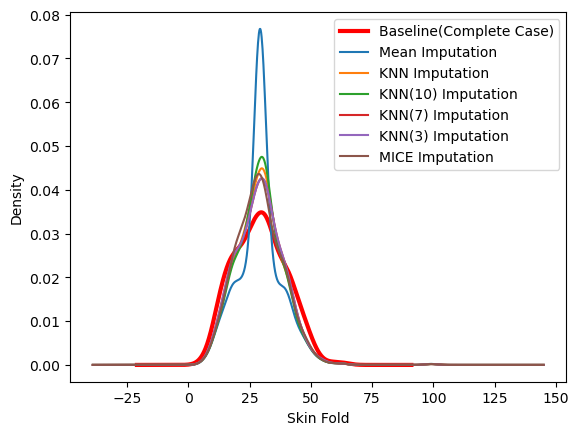

In [26]:
# Comparing density plots

diabetes_cc['Skin_Fold'].plot(kind ='kde', c= 'red', linewidth = 3)
diabetes_mean['Skin_Fold'].plot(kind ='kde')
diabetes_knn['Skin_Fold'].plot(kind ='kde')
diabetes_knn_10['Skin_Fold'].plot(kind ='kde')
diabetes_knn_7['Skin_Fold'].plot(kind ='kde')
diabetes_knn_3['Skin_Fold'].plot(kind ='kde')
diabetes_MICE['Skin_Fold'].plot(kind ='kde')

labels = ['Baseline(Complete Case)', 'Mean Imputation',
         'KNN Imputation', 'KNN(10) Imputation', 'KNN(7) Imputation', 'KNN(3) Imputation',
         'MICE Imputation']

plt.legend(labels)
plt.xlabel('Skin Fold')

Text(0.5, 0, 'Skin Fold')

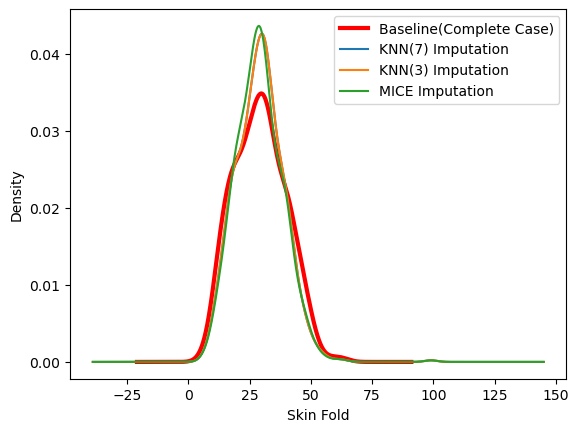

In [27]:
# Comparing density plots

diabetes_cc['Skin_Fold'].plot(kind ='kde', c= 'red', linewidth = 3)
#diabetes_mean['Skin_Fold'].plot(kind ='kde')
#diabetes_knn['Skin_Fold'].plot(kind ='kde')
#diabetes_knn_10['Skin_Fold'].plot(kind ='kde')
diabetes_knn_7['Skin_Fold'].plot(kind ='kde')
diabetes_knn_3['Skin_Fold'].plot(kind ='kde')
diabetes_MICE['Skin_Fold'].plot(kind ='kde')

labels = ['Baseline(Complete Case)', 'KNN(7) Imputation','KNN(3) Imputation' ,'MICE Imputation']

plt.legend(labels)
plt.xlabel('Skin Fold')

## Final set

In [28]:
diabetes = diabetes_knn_3.copy(deep =True)

In [29]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           752 non-null    float64
 1   Glucose            752 non-null    float64
 2   Diastolic_BP       752 non-null    float64
 3   Skin_Fold          752 non-null    float64
 4   Serum_Insulin      752 non-null    float64
 5   BMI                752 non-null    float64
 6   Diabetes_Pedigree  752 non-null    float64
 7   Age                752 non-null    float64
 8   Class              752 non-null    float64
dtypes: float64(9)
memory usage: 53.0 KB


In [30]:
diabetes.to_csv('diabetes_no_MCAR_final.csv', index = False)